Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

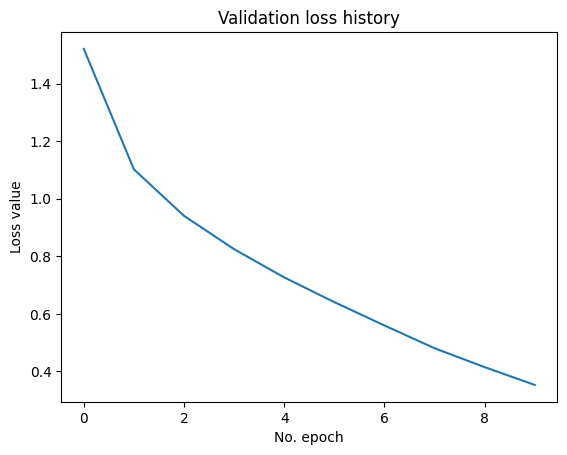

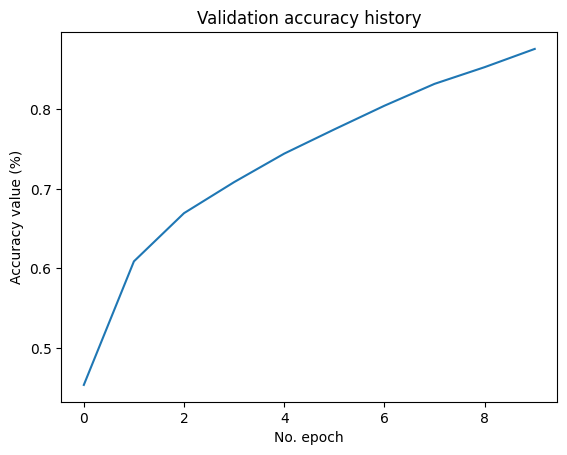

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
960/960 [==============================] - 55s 55ms/step - loss: 1.4277 - accuracy: 0.4827
Epoch 2/10
960/960 [==============================] - 50s 52ms/step - loss: 1.0608 - accuracy: 0.6272
Epoch 3/10
960/960 [==============================] - 48s 50ms/step - loss: 0.9090 - accuracy: 0.6808
Epoch 4/10
960/960 [==============================] - 54s 56ms/step - loss: 0.7912 - accuracy: 0.7225
Epoch 5/10
960/960 [==============================] - 50s 52ms/step - loss: 0.6962 - accuracy: 0.7558
Epoch 6/10
960/960 [==============================] - 53s 55ms/step - loss: 0.5983 - accuracy: 0.7911
Epoch 7/10
960/960 [==============================] - 56s 58ms/step - loss: 0.5083 - accuracy: 0.8224
Epoch 8/10
960/960 [==============================] - 50s 52ms/step - loss: 0.4299 - accuracy: 0.8486
Epoch 9/10
960/960 [==============================] - 47s 49ms/step - loss: 0.3507 - ac

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 10  
optimizer = Adam()
verbosity = 1

(input_train, target_train), (input_test, target_test) = cifar10.load_data()

input_shape = (img_width, img_height, img_num_channels)

input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

input_train = input_train / 255
input_test = input_test / 255

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

model.summary()

model.compile(loss=loss_function, optimizer=optimizer,metrics=['accuracy'])

history = model.fit(input_train, target_train, batch_size=batch_size, epochs=no_epochs, verbose=verbosity)

score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

plt.plot(history.history['loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

from sklearn.model_selection import KFold
import numpy as np


batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10 
no_epochs = 10
verbosity = 1
num_folds = 5

(input_train, target_train), (input_test, target_test) = cifar10.load_data()

input_shape = (img_width, img_height, img_num_channels)

input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

input_train = input_train / 255.0
input_test = input_test / 255.0

acc_per_fold = []
loss_per_fold = []

inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(no_classes, activation='softmax'))

    optimizer = Adam()
    
    model.compile(loss=loss_function,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    print(f'Training for fold {fold_no} ...')

    history = model.fit(inputs[train], targets[train],
                        batch_size=batch_size,
                        epochs=no_epochs,
                        verbose=verbosity)

    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1] * 100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    fold_no += 1
    
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')